<a href="https://colab.research.google.com/github/arizky012/Deep-Learning/blob/master/01_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libs import
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras import models, layers
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from tensorflow.python.util import deprecation

import matplotlib.pyplot as plt
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
# fetching dataset
dataset = fetch_openml('mnist_784')

# suppress warning
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [0]:
# reshaping
data = dataset.data.reshape((dataset.data.shape[0], 28, 28))

# reshaping + add new axis
data = data[:, :, :, np.newaxis]

In [0]:
# skalakan dari range 0-255 menjadi range 0-1
scaled_data = data / 255.0

In [0]:
# split training & test
(x_train, x_test, y_train, y_test) = train_test_split(
    scaled_data,
    dataset.target.astype("float32"), 
    test_size = 0.20)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 28, 28, 1)
(56000,)
(14000, 28, 28, 1)
(14000,)


In [0]:
# transformasi target training dengan one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)

# transformasi target testing dengan one-hot encoding
y_test = np_utils.to_categorical(y_test, 10)

# One hot encoding is a process by which categorical variables are 
# converted into a form that could be provided to ML algorithms to 
# do a better job in prediction.

In [0]:
# instantiasikan model sequential kosong
model = Sequential()

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# C1 Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", input_shape=(28,28,1), padding="same"))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.Conv2D(512, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

#Output Layer (softmax activation)
model.add(layers.Dense(10, activation="softmax"))

opt = Adam(lr=0.001)

# model compiling
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 256)      

In [0]:
# epoch 50
hist = model.fit(x=x_train,y=y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 56000 samples, validate on 14000 samples
Epoch 1/50
56000/56000 [==============================] - 241s 4ms/step - loss: 2.3023 - acc: 0.1124 - val_loss: 2.3015 - val_acc: 0.1121
Epoch 2/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1121
Epoch 3/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3014 - acc: 0.1126 - val_loss: 2.3013 - val_acc: 0.1121
Epoch 4/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3013 - acc: 0.1126 - val_loss: 2.3013 - val_acc: 0.1121
Epoch 5/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3014 - acc: 0.1126 - val_loss: 2.3012 - val_acc: 0.1121
Epoch 6/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3013 - acc: 0.1126 - val_loss: 2.3012 - val_acc: 0.1121
Epoch 7/50
56000/56000 [==============================] - 230s 4ms/step - loss: 2.3012 - acc: 0.1126 - val_loss: 2.3012 - 

In [0]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

14000/14000 [==============================] - 20s 1ms/step
Test loss 2.3012, accuracy 11.21%


Text(0, 0.5, 'acc')

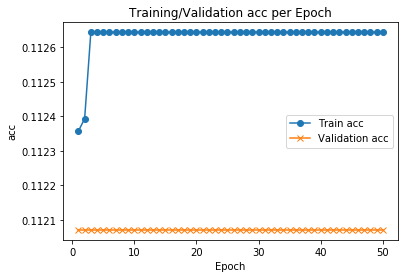

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["acc"], "o-")
ax.plot([None] + hist.history["val_acc"], "x-")

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc") 

Text(0, 0.5, 'acc')

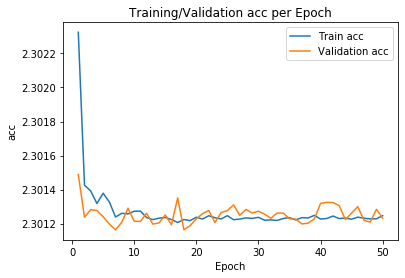

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"])
ax.plot([None] + hist.history["val_loss"])

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")